# Polynomial Formula

Why does the formula in the proof for Theorem 2.4 work?

$$f(x) = \Sigma_{i=1}^{n+1} y_t (\Pi_{j \ne i} \frac{x - x_j}{x_i - x_j})$$

In [9]:
import numpy as np
import seaborn as sb
from typing import Callable, List
from dataclasses import dataclass, field
from matplotlib.axes import Axes
from matplotlib.figure import Figure

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Let's do a couple examples.  Suppose we are looking at a parabola.

In [12]:
@dataclass
class FunctionPlotter:
    support: np.ndarray
    f: Callable[[float], float]
    f_name: str
    data: np.ndarray = field(init=False)
    plot: Axes = field(init=False)
    
    def __post_init__(self) -> None:
        self.data: np.ndarray = np.array([self.f(x) for x in self.support])
        self.plot: Axes = FunctionPlotter.plot(
            support=self.support,
            data=self.data,
            f_name=self.f_name
        )
        
    @staticmethod
    def plot(support: np.ndarray, data: np.ndarray, f_name: str) -> Axes:
        fig: Figure
        ax: Axes
        fig, ax = plt.subplots(figsize=(15, 8))
        sb.lineplot(x=support, y=data, ax=ax)
        ax.set_title(f_name, fontsize=22)
        return ax

FunctionPlotter(support=array([-4.        , -3.57894737, -3.15789474, -2.73684211, -2.31578947,
       -1.89473684, -1.47368421, -1.05263158, -0.63157895, -0.21052632,
        0.21052632,  0.63157895,  1.05263158,  1.47368421,  1.89473684,
        2.31578947,  2.73684211,  3.15789474,  3.57894737,  4.        ]), f=<function <lambda> at 0x7f9a3b992700>, f_name='Parabola Plot', data=array([16.        , 12.80886427,  9.97229917,  7.49030471,  5.36288089,
        3.5900277 ,  2.17174515,  1.10803324,  0.39889197,  0.04432133,
        0.04432133,  0.39889197,  1.10803324,  2.17174515,  3.5900277 ,
        5.36288089,  7.49030471,  9.97229917, 12.80886427, 16.        ]), plot=<AxesSubplot:title={'center':'Parabola Plot'}>)

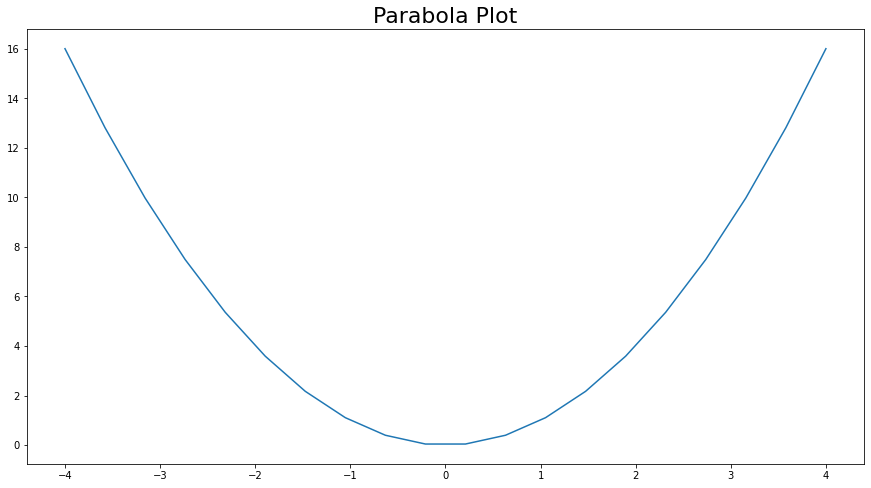

In [13]:
parabola: Callable[[float], float] = lambda x: x**2
parab_plot: FunctionPlotter = FunctionPlotter(
    support=np.linspace(-4, 4, 20),
    f=parabola,
    f_name="Parabola Plot"
)

parab_plot

$$f(x) = \Sigma_{i}^n \Pi_{j \ne i}^{n} \frac{x - x_j}{x_i - x_j}$$

In [17]:
def frac_func(x: float, x_i: float, x_j: float) -> float:
    return (x - x_j) / (x_i - x_j)

for i in range(-4, 5):
    x_i = 0
    x = 1
    x_j = i
    if x_i != x_j:
        print(x, x_i, x_j, frac_func(x, x_i, x_j))

1 0 -4 1.25
1 0 -3 1.3333333333333333
1 0 -2 1.5
1 0 -1 2.0
1 0 1 -0.0
1 0 2 0.5
1 0 3 0.6666666666666666
1 0 4 0.75
